In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
#Definizione di titoli e pesi
tickers = ['AAPL', 'MSFT', 'GOOG']
weights = np.array([0.4, 0.4, 0.2])
#Intervallo temporale
start_date = '2020-01-01'
end_date = '2024-12-31'
#Livello di confidenza
confidence_level = 0.95
alpha = 1 - confidence_level

In [6]:
#scarichiamo dati con yfinance
data = yf.download(tickers, start=start_date, end=end_date)
#calcoliamo il rendimento dei titoli utilizzando prezzo chiusura (percentuale o lagaritmico)
adj_close = data['Close']
returns = adj_close.pct_change().dropna()
returns.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,GOOG,MSFT
Date,,,
2020-01-03,-0.009722,-0.004907,-0.012452
2020-01-06,0.007968,0.024657,0.002585
2020-01-07,-0.004703,-0.000624,-0.009118
2020-01-08,0.016086,0.007880,0.015928
2020-01-09,0.021241,0.011044,0.012493


<Axes: title={'center': 'Rendimenti giornalieri del portafoglio'}, xlabel='Date'>

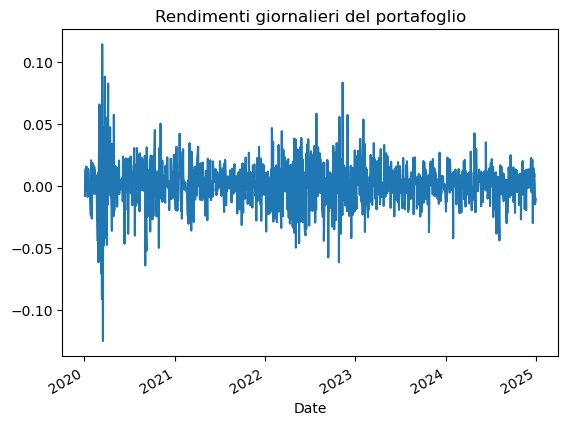

In [7]:
#calcoliamo il rendimento del portafoglio
portfolio_returns = returns @ weights
portfolio_returns.name = 'Portfolio Return'
portfolio_returns.plot(title='Rendimenti giornalieri del portafoglio')

In [8]:
#Il VaR storico è il quantile al livello alpha della distribuzione dei rendimenti osservati
VaR_hist = np.percentile(portfolio_returns, 100 * alpha)
#Simulazione Monte Calro con rendimenti normalizzati
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()
#Simulazione di 100000 rendimenti giornalieri 
simulations = np.random.normal(mu, sigma, 100000)
#Calcolo VaR come quantile simulato
VaR_MC = np.percentile(simulations, 100 * alpha)
#Scrivo risultati
print(f"VaR Storico (95%): {VaR_hist:.4%}")
print(f"VaR Monte Carlo (95%): {VaR_MC:.4%}")

VaR Storico (95%): -2.7373%
VaR Monte Carlo (95%): -2.8439%


In [9]:
#Calcolo CVaR storico
CVaR_hist = portfolio_returns[portfolio_returns <= VaR_hist].mean()
#Calcolo CVaR come quantile simulato
CVaR_MC = simulations[simulations <= VaR_MC].mean()
#Scrivo risultati
print(f"CVaR Storico (95%): {CVaR_hist:.4%}")
print(f"CVaR Monte Carlo (95%): {CVaR_MC:.4%}")

CVaR Storico (95%): -4.0924%
CVaR Monte Carlo (95%): -3.5988%


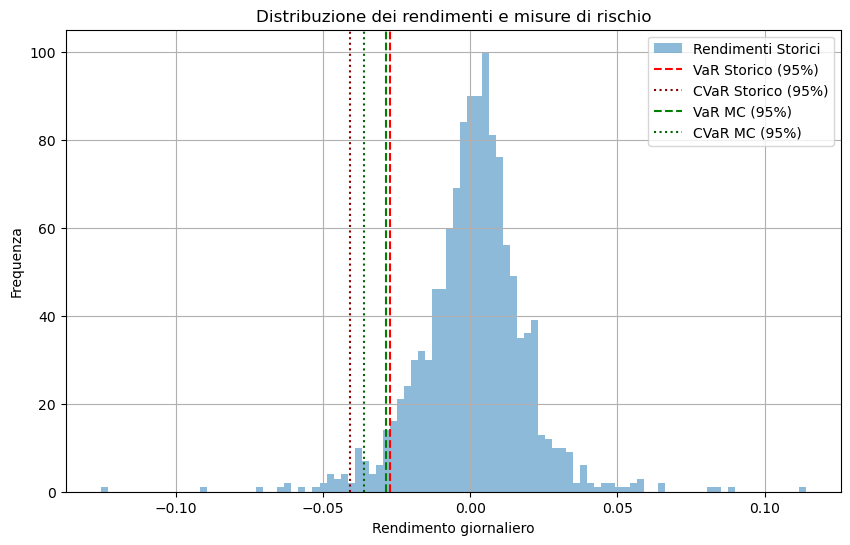

In [10]:
#Traccio grafico per notare differenze
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=100, alpha=0.5, label='Rendimenti Storici')
plt.axvline(VaR_hist, color='red', linestyle='--', label='VaR Storico (95%)')
plt.axvline(CVaR_hist, color='darkred', linestyle=':', label='CVaR Storico (95%)')
plt.axvline(VaR_MC, color='green', linestyle='--', label='VaR MC (95%)')
plt.axvline(CVaR_MC, color='darkgreen', linestyle=':', label='CVaR MC (95%)')
plt.title('Distribuzione dei rendimenti e misure di rischio')
plt.xlabel('Rendimento giornaliero')
plt.ylabel('Frequenza')
plt.legend()
plt.grid(True)
plt.show()